In [11]:
import os

In [12]:
os.getcwd()

'C:\\Users\\mshiha'

In [13]:
print(os.listdir(os.getcwd()))

['.anaconda', '.cisco', '.conda', '.condarc', '.config', '.Icecream Screen Recorder', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.PyCharmCE2019.2', '.spyder-py3', '01-Decision Trees and Random Forests in Python.ipynb', '01-K Means Clustering with Python.ipynb', '01-NLP (Natural Language Processing) with Python.ipynb', '01-Principal Component Analysis.ipynb', '01-Support Vector Machines with Python.ipynb', '02-Decision Trees and Random Forest Project.ipynb', '02-K Means Clustering Project.ipynb', '02-K Nearest Neighbors Project.ipynb', '02-Logistic Regression Project.ipynb', '02-NLP Project.ipynb', '02-Support Vector Machines Project.ipynb', '03-Decision Trees and Random Forest Project - Solutions.ipynb', '03-K Means Clustering Project - Solutions.ipynb', '03-NLP Project - Solutions.ipynb', '03-Support Vector Machines Project - Solutions.ipynb', '3D Objects', 'AB_NYC_2019.csv', 'advertising.csv', 'age_gender_bkts.csv', 'Air BNB second Trial.ipynb', 'AIR BNB-Seedo.ipyn

In [14]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
#Importing CSV files and finding their info

In [16]:
train_users=pd.read_csv('train_users_2.csv')

In [17]:
train_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [18]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


In [19]:
train_users.shape

(213451, 16)

In [20]:
#There are many missing values for age,date_first_booking,first_affiliate_tracked#

In [21]:
test_users=pd.read_csv('test_users.csv')

In [22]:
test_users.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [23]:
test_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 15 columns):
id                         62096 non-null object
date_account_created       62096 non-null object
timestamp_first_active     62096 non-null int64
date_first_booking         0 non-null float64
gender                     62096 non-null object
age                        33220 non-null float64
signup_method              62096 non-null object
signup_flow                62096 non-null int64
language                   62096 non-null object
affiliate_channel          62096 non-null object
affiliate_provider         62096 non-null object
first_affiliate_tracked    62076 non-null object
signup_app                 62096 non-null object
first_device_type          62096 non-null object
first_browser              62096 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 7.1+ MB


In [24]:
test_users.shape

(62096, 15)

In [25]:
####All the date_first_booking data are misiing in tne test data

In [26]:
countries=pd.read_csv('countries.csv')

In [27]:
countries.head()

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06


In [28]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 7 columns):
country_destination              10 non-null object
lat_destination                  10 non-null float64
lng_destination                  10 non-null float64
distance_km                      10 non-null float64
destination_km2                  10 non-null float64
destination_language             10 non-null object
language_levenshtein_distance    10 non-null float64
dtypes: float64(5), object(2)
memory usage: 640.0+ bytes


In [29]:
countries.shape

(10, 7)

In [30]:
age_gender=pd.read_csv('age_gender_bkts.csv')

In [31]:
age_gender.tail()

,age_bucket,country_destination,gender,population_in_thousands,year
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0
419,80-84,US,male,2442.0,2015.0


In [32]:
age_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420 entries, 0 to 419
Data columns (total 5 columns):
age_bucket                 420 non-null object
country_destination        420 non-null object
gender                     420 non-null object
population_in_thousands    420 non-null float64
year                       420 non-null float64
dtypes: float64(2), object(3)
memory usage: 16.5+ KB


In [33]:
age_gender.shape

(420, 5)

In [34]:
sessions=pd.read_csv('sessions.csv')

In [35]:
sessions.head()

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [36]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10567737 entries, 0 to 10567736
Data columns (total 6 columns):
user_id          object
action           object
action_type      object
action_detail    object
device_type      object
secs_elapsed     float64
dtypes: float64(1), object(5)
memory usage: 483.8+ MB


In [37]:
sessions.shape

(10567737, 6)

In [38]:
sample=pd.read_csv('sample_submission_NDF.csv')

In [39]:
sample.head()

,id,country
0,5uwns89zht,NDF
1,jtl0dijy2j,NDF
2,xx0ulgorjt,NDF
3,6c6puo6ix0,NDF
4,czqhjk3yfe,NDF


In [40]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62096 entries, 0 to 62095
Data columns (total 2 columns):
id         62096 non-null object
country    62096 non-null object
dtypes: object(2)
memory usage: 970.3+ KB


In [41]:
sample.shape

(62096, 2)

## EXploring training data##

In [42]:
train_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null int64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(1), int64(2), object(13)
memory usage: 26.1+ MB


#There are many missing values for age,date_first_booking,first_affiliate_tracked#

## We will check if age_gender bucket data can help us with missing values of age###

In [43]:
age_gender['country_destination'].unique()

array(['AU', 'CA', 'DE', 'ES', 'FR', 'GB', 'IT', 'NL', 'PT', 'US'],
      dtype=object)

In [44]:
age_gender[age_gender['country_destination']=='US']

,age_bucket,country_destination,gender,population_in_thousands,year
378,90-94,US,female,1193.0,2015.0
379,75-79,US,male,3641.0,2015.0
380,70-74,US,male,5278.0,2015.0
381,65-69,US,male,7561.0,2015.0
382,60-64,US,male,9217.0,2015.0
383,55-59,US,male,10689.0,2015.0
384,50-54,US,male,11013.0,2015.0
385,45-49,US,male,10454.0,2015.0
386,40-44,US,male,10159.0,2015.0
387,10-14,US,female,10346.0,2015.0


In [45]:
age_gender.groupby(['gender','country_destination']).mean()

population_in_thousands    year
gender country_destination                                 
female AU                                572.571429  2015.0
       CA                                860.285714  2015.0
       DE                               1999.857143  2015.0
       ES                               1136.666667  2015.0
       FR                               1594.904762  2015.0
       GB                               1540.238095  2015.0
       IT                               1495.476190  2015.0
       NL                                404.095238  2015.0
       PT                                260.380952  2015.0
       US                               7859.666667  2015.0
male   AU                                566.619048  2015.0
       CA                                847.857143  2015.0
       DE                               1931.666667  2015.0
       ES                               1111.095238  2015.0
       FR                               1499.523810  2015.0
       GB                               1499.761905  2015.0
       IT                               1416.190476  2015.0
       NL                                398.190476  2015.0
       PT                                244.809524  2015.0
       US                               7622.809524  2015.0

In [46]:
age_gender.groupby(['age_bucket','country_destination']).count()

gender  population_in_thousands  year
age_bucket country_destination                                       
0-4        AU                        2                        2     2
           CA                        2                        2     2
           DE                        2                        2     2
           ES                        2                        2     2
           FR                        2                        2     2
           GB                        2                        2     2
           IT                        2                        2     2
           NL                        2                        2     2
           PT                        2                        2     2
           US                        2                        2     2
10-14      AU                        2                        2     2
           CA                        2                        2     2
           DE                        2                        2     2
           ES                        2                        2     2
           FR                        2                        2     2
           GB                        2                        2     2
           IT                        2                        2     2
           NL                        2                        2     2
           PT                        2                        2     2
           US                        2                        2     2
100+       AU                        2                        2     2
           CA                        2                        2     2
           DE                        2                        2     2
           ES                        2                        2     2
           FR                        2                        2     2
           GB                        2                        2     2
           IT                        2                        2     2
           NL                        2                        2     2
           PT                        2                        2     2
           US                        2                        2     2
...                                ...                      ...   ...
85-89      AU                        2                        2     2
           CA                        2                        2     2
           DE                        2                        2     2
           ES                        2                        2     2
           FR                        2                        2     2
           GB                        2                        2     2
           IT                        2                        2     2
           NL                        2                        2     2
           PT                        2                        2     2
           US                        2                        2     2
90-94      AU                        2                        2     2
           CA                        2                        2     2
           DE                        2                        2     2
           ES                        2                        2     2
           FR                        2                        2     2
           GB                        2                        2     2
           IT                        2                        2     2
           NL                        2                        2     2
           PT                        2                        2     2
           US                        2                        2     2
95-99      AU                        2                        2     2
           CA                        2                        2     2
           DE                        2                        2     2
           ES                        2                        2     2
           FR                        2    

### Concatinating train and test data####

In [47]:
df=pd.concat([train_users,test_users],axis=0)

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [48]:
df.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,20090609231247
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,20091031060129
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,20091208061105


In [49]:
df.shape

(275547, 16)

In [50]:
df.tail()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
62091,direct,direct,31.0,NaN,2014-09-30,NaN,untracked,IE,Windows Desktop,-unknown-,cv0na2lf5a,en,Web,0,basic,20140930235232
62092,direct,direct,NaN,NaN,2014-09-30,NaN,untracked,-unknown-,Android Phone,-unknown-,zp8xfonng8,ko,Android,23,basic,20140930235306
62093,direct,direct,NaN,NaN,2014-09-30,NaN,linked,Firefox,Windows Desktop,-unknown-,fa6260ziny,de,Web,0,basic,20140930235408
62094,sem-brand,google,NaN,NaN,2014-09-30,NaN,omg,Safari,Mac Desktop,-unknown-,87k0fy4ugm,en,Web,0,basic,20140930235430
62095,other,other,49.0,NaN,2014-09-30,NaN,tracked-other,Chrome,Windows Desktop,FEMALE,9uqfg8txu3,en,Web,0,basic,20140930235901


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 35.7+ MB


## Creating a copy of the data frame to work on

In [99]:
df_2=df.copy()

## Data Exploration

In [100]:
###Analyzing age####
df_2.age.nunique()

145

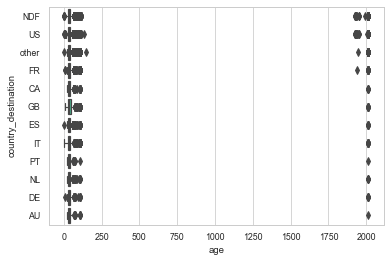

In [101]:
sns.set(style='whitegrid',palette='deep',font_scale=1,rc=None)
sns.set_context('paper')
sns.boxplot(x='age',y='country_destination',data=df_2)

#### It is obvious that there are many outliers in the age

In [55]:
df_2[df_2.age>110]

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
388,other,craigslist,2014.0,FR,2010-04-11,2010-04-13,untracked,Firefox,Windows Desktop,-unknown-,v2x0ms9c62,en,Web,3,basic,20100411065602
673,other,craigslist,2014.0,NDF,2010-05-25,NaN,untracked,Safari,Mac Desktop,FEMALE,umf1wdk9uc,en,Web,2,basic,20100525155541
1040,other,craigslist,2014.0,US,2010-07-14,2010-07-15,untracked,Chrome,Mac Desktop,MALE,m82epwn7i8,en,Web,0,facebook,20100714230556
1177,direct,direct,2013.0,US,2010-07-25,2010-07-26,untracked,Chrome,Mac Desktop,MALE,2th813zdx7,en,Web,3,facebook,20100725234419
1200,direct,direct,2014.0,US,2010-07-27,2010-07-29,untracked,IE,Windows Desktop,FEMALE,3amf04n3o3,en,Web,2,basic,20100727190447
1239,direct,direct,2014.0,CA,2010-07-30,2010-07-30,untracked,Firefox,Mac Desktop,FEMALE,6vpmryt377,en,Web,0,basic,20100730055204
1257,direct,direct,2014.0,US,2010-08-01,2010-08-01,untracked,Chrome,Windows Desktop,MALE,uxy91xb5p2,en,Web,3,facebook,20100801071023
1308,other,craigslist,2014.0,NDF,2010-08-06,NaN,linked,Chrome,Windows Desktop,MALE,bno0vva4uz,en,Web,3,basic,20100806133725
1474,other,craigslist,2014.0,NDF,2010-08-21,NaN,untracked,Safari,Mac Desktop,MALE,h3rrmak4tu,pt,Web,2,facebook,20100821225214
1502,sem-non-brand,google,2014.0,US,2010-08-24,2010-08-25,untracked,Chrome,Windows Desktop,FEMALE,fou0j7fhnm,en,Web,3,basic,20100824205045


In [56]:
df_2[df_2.age>110].count()

affiliate_channel          850
affiliate_provider         850
age                        850
country_destination        801
date_account_created       850
date_first_booking         382
first_affiliate_tracked    815
first_browser              850
first_device_type          850
gender                     850
id                         850
language                   850
signup_app                 850
signup_flow                850
signup_method              850
timestamp_first_active     850
dtype: int64

In [57]:
df_2[df_2.age<15]

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
193,sem-non-brand,google,5.0,FR,2010-03-06,2010-03-08,NaN,-unknown-,Other/Unknown,FEMALE,3qsa4lo7eg,en,Web,3,basic,20100306184019
482,other,craigslist,5.0,IT,2010-04-29,2010-04-29,tracked-other,Safari,Mac Desktop,FEMALE,rzhouzy2ok,en,Web,0,facebook,20100429161617
642,direct,direct,5.0,NDF,2010-05-20,NaN,NaN,-unknown-,Other/Unknown,-unknown-,5yatk13sko,en,Web,2,facebook,20100520212258
660,direct,direct,5.0,NDF,2010-05-24,NaN,untracked,Safari,Mac Desktop,FEMALE,593gkcul8c,en,Web,2,facebook,20100524042738
776,other,craigslist,5.0,NDF,2010-06-07,NaN,untracked,Safari,Mac Desktop,MALE,tu2iorbez0,en,Web,2,facebook,20100607173548
780,direct,direct,5.0,NDF,2010-06-07,NaN,linked,Mobile Safari,iPhone,-unknown-,zgxbrsgjcn,fr,Web,0,basic,20100607220745
781,content,google,5.0,NDF,2010-06-07,NaN,linked,IE,Windows Desktop,MALE,4395zaz8fe,en,Web,2,facebook,20100607235738
812,sem-non-brand,google,5.0,US,2010-06-14,2010-06-18,untracked,IE,Windows Desktop,-unknown-,s8wb7qdjqc,en,Web,2,facebook,20100614013701
816,direct,direct,5.0,NDF,2010-06-14,NaN,NaN,-unknown-,Other/Unknown,MALE,ceum3xl08h,en,Web,2,facebook,20100614171620
837,direct,direct,5.0,NDF,2010-06-16,NaN,untracked,Chrome,Mac Desktop,FEMALE,s016mu0c9w,en,Web,2,facebook,20100616151810


In [58]:
df_2[df_2.age<15].count()

affiliate_channel          59
affiliate_provider         59
age                        59
country_destination        57
date_account_created       59
date_first_booking         14
first_affiliate_tracked    40
first_browser              59
first_device_type          59
gender                     59
id                         59
language                   59
signup_app                 59
signup_flow                59
signup_method              59
timestamp_first_active     59
dtype: int64

#### We will find the average value of the age  for all values between 15 & 110 and use it to replace the outlier values

In [59]:
df_2[(df_2.age<110)&(df_2.age>15)].age.mean()

36.760967404068936

In [60]:
#The current age mean taking the effect of the outliers
df_2.age.mean()

47.145310402631694

In [61]:
##Replacing the outliers greater than 110 and smaller than 15 by 37
df_2.loc[df_2.age>110,'age']=37
df_2.loc[df_2.age<15,'age']=37

In [62]:
# checkung max,min and average values after removing outliers

In [63]:
df_2.age.max()

110.0

In [64]:
df_2.age.min()

15.0

In [65]:
df_2.age.mean()

36.8663356041366

#### mean decreased from 47 to 36.8 after removing outliers

In [66]:
##Analyzing Gender
df_2['gender'].unique()

array(['-unknown-', 'MALE', 'FEMALE', 'OTHER'], dtype=object)

In [67]:
df_2['gender'].value_counts()

-unknown-    129480
FEMALE        77524
MALE          68209
OTHER           334
Name: gender, dtype: int64

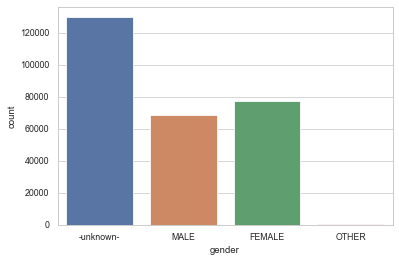

In [68]:
sns.countplot(x='gender',data=df_2)

#### There are many unknown genders

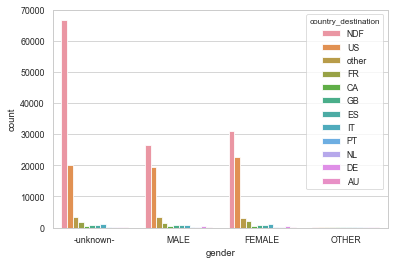

In [69]:
sns.countplot(x='gender',data=df_2,hue='country_destination')

most of the NDF users are of the unknown genders,also most of the users select US regardless the gender

In [70]:
##Analyzing the affiliate channel
df_2.affiliate_channel.unique()

array(['direct', 'seo', 'other', 'sem-non-brand', 'content', 'sem-brand',
       'remarketing', 'api'], dtype=object)

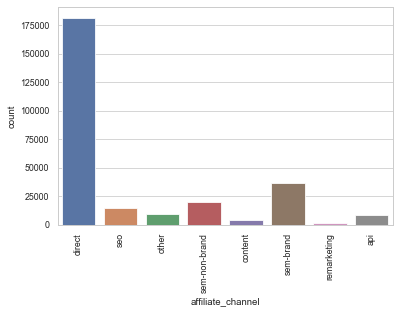

In [75]:
plt.xticks(rotation=90) 
sns.countplot(x='affiliate_channel',data=df_2)

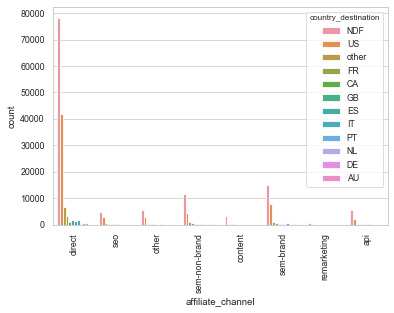

In [76]:
plt.xticks(rotation=90) 
sns.countplot(x='affiliate_channel',data=df_2,hue='country_destination')

In [63]:
df_2.affiliate_channel.value_counts()

direct           181571
sem-brand         36439
sem-non-brand     20075
seo               14362
other              9547
api                8167
content            4118
remarketing        1268
Name: affiliate_channel, dtype: int64

#### most of the paid marketing is direct

In [64]:
##Analyzing the affiliate Provider
df_2.affiliate_provider.unique()

array(['direct', 'google', 'other', 'craigslist', 'facebook', 'vast',
       'bing', 'meetup', 'facebook-open-graph', 'email-marketing',
       'yahoo', 'padmapper', 'gsp', 'wayn', 'naver', 'baidu', 'yandex',
       'daum'], dtype=object)

In [65]:
df_2.affiliate_provider.nunique()

18

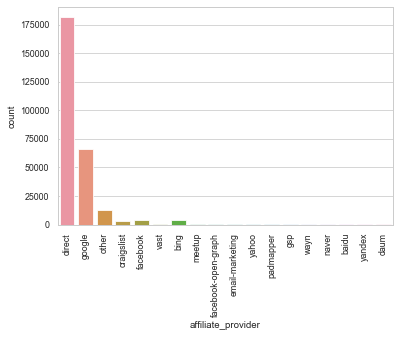

In [81]:
plt.xticks(rotation=90) 
sns.countplot(x='affiliate_provider',data=df_2)

In [82]:
df_2.affiliate_provider.value_counts()

direct                 181270
google                  65956
other                   13036
facebook                 3996
bing                     3719
craigslist               3475
padmapper                 836
vast                      830
yahoo                     653
facebook-open-graph       566
gsp                       455
meetup                    358
email-marketing           270
naver                      66
baidu                      32
yandex                     18
wayn                        8
daum                        3
Name: affiliate_provider, dtype: int64

#### most of the providers are direct providers

In [79]:
##Analyzing the first_affiliate
df_2.first_affiliate_tracked.unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

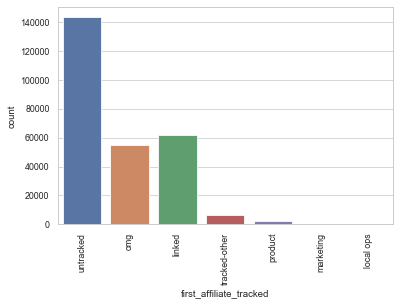

In [80]:
plt.xticks(rotation=90) 
sns.countplot(x='first_affiliate_tracked',data=df_2)

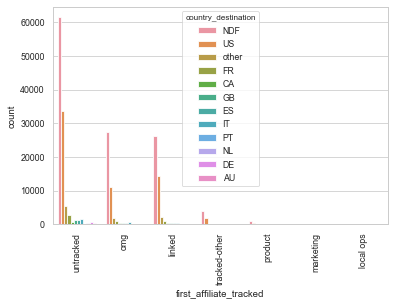

In [95]:
plt.xticks(rotation=90) 
sns.countplot(x='first_affiliate_tracked',data=df_2,hue='country_destination')

In [71]:
#Analyzing the signup method
df_2.signup_method.unique()

array(['facebook', 'basic', 'google', 'weibo'], dtype=object)

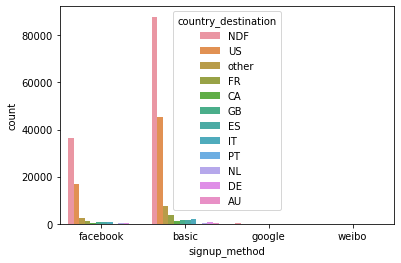

In [72]:
sns.countplot(x='signup_method',data=df_2,hue='country_destination')

In [73]:
df_2.signup_method.value_counts()

basic       198222
facebook     74864
google        2438
weibo           23
Name: signup_method, dtype: int64

#### most of the users signed up using the basic methods

In [74]:
#Analyzing the signup flow
df_2.signup_flow.unique()

array([ 0,  3,  2,  1, 24,  8,  6,  5, 10, 25, 12,  4, 16, 15, 20, 21, 23,
       14], dtype=int64)

In [75]:
#Analyzing the signup app

In [76]:
df_2.signup_app.unique()

array(['Web', 'Moweb', 'iOS', 'Android'], dtype=object)

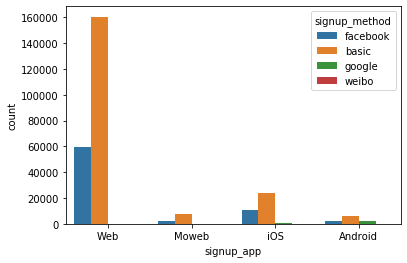

In [77]:
sns.countplot(x='signup_app',data=df_2,hue='signup_method')

In [78]:
#Analyzing first device
df_2.first_device_type.unique()

array(['Mac Desktop', 'Windows Desktop', 'iPhone', 'Other/Unknown',
       'Desktop (Other)', 'Android Tablet', 'iPad', 'Android Phone',
       'SmartPhone (Other)'], dtype=object)

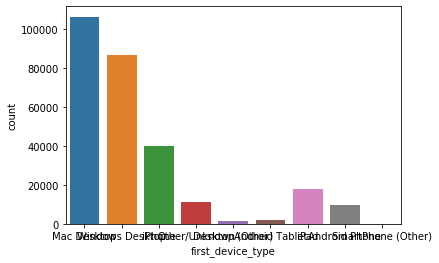

In [79]:
sns.countplot(x='first_device_type',data=df_2)

In [80]:
df_2.first_device_type.value_counts()

Mac Desktop           106328
Windows Desktop        86948
iPhone                 39814
iPad                   18036
Other/Unknown          11167
Android Phone           9458
Android Tablet          2098
Desktop (Other)         1507
SmartPhone (Other)       191
Name: first_device_type, dtype: int64

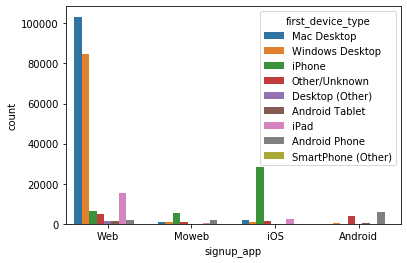

In [81]:
sns.countplot(x='signup_app',hue='first_device_type',data=df_2)

In [82]:
#Analyzing first browser
df_2.first_browser.unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon', 'IBrowse',
       'Nintendo Browser', 'UC Browser'], dtype=object)

In [83]:
df_2.first_browser.value_counts()

Chrome                  78671
Safari                  53302
-unknown-               44394
Firefox                 38665
Mobile Safari           29636
IE                      24744
Chrome Mobile            3186
Android Browser          1577
AOL Explorer              254
Opera                     228
Silk                      172
IE Mobile                 118
BlackBerry Browser         89
Chromium                   83
Mobile Firefox             64
Maxthon                    60
Apple Mail                 45
Sogou Explorer             43
SiteKiosk                  27
RockMelt                   24
Iron                       24
Yandex.Browser             14
IceWeasel                  14
Pale Moon                  13
CometBird                  12
SeaMonkey                  12
Camino                      9
TenFourFox                  8
Opera Mini                  8
wOSBrowser                  7
CoolNovo                    6
Avant Browser               4
Opera Mobile                4
Mozilla   

In [85]:
df_2.language.value_counts()

en           265538
zh             2634
fr             1508
es             1174
ko             1116
de              977
it              633
ru              508
ja              345
pt              322
sv              176
nl              134
tr               92
pl               75
da               75
no               51
cs               49
el               30
th               28
hu               25
id               23
fi               20
ca                6
is                5
hr                2
-unknown-         1
Name: language, dtype: int64

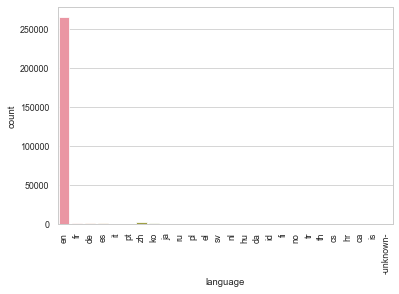

In [102]:
plt.xticks(rotation=90) 
sns.countplot(x='language',data=df_2)

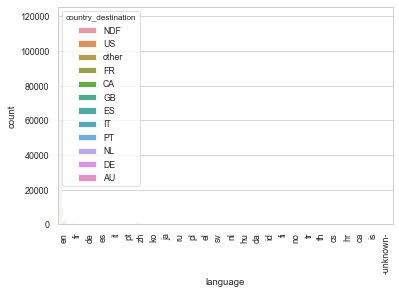

In [103]:
plt.xticks(rotation=90) 
sns.countplot(x='language',data=df_2,hue='country_destination')

In [88]:
#Analyzing country destination

In [89]:
df_2.country_destination.unique()

array(['NDF', 'US', 'other', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL',
       'DE', 'AU', nan], dtype=object)

In [90]:
df_2.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

In [91]:
df_2.country_destination.describe()

count     213451
unique        12
top          NDF
freq      124543
Name: country_destination, dtype: object

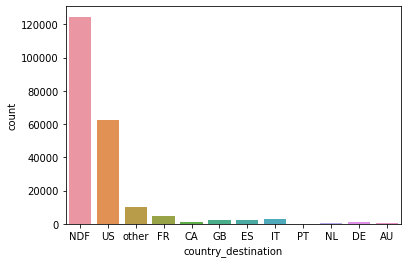

In [92]:
sns.countplot(x='country_destination',data=df_2)

In [93]:
#Analyzing the date of first booking
df_2.date_first_booking.nunique()

1976

In [94]:
#checking if we have booking and corresponding NDF
df_2[df_2['country_destination']=='NDF']

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,20090319043255
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,20090523174809
11,other,craigslist,47.0,NDF,2010-01-05,NaN,untracked,-unknown-,iPhone,FEMALE,om1ss59ys8,en,Web,0,basic,20100105051812
13,other,craigslist,37.0,NDF,2010-01-05,NaN,linked,Firefox,Mac Desktop,FEMALE,dy3rgx56cu,en,Web,0,basic,20100105083259
14,other,craigslist,36.0,NDF,2010-01-07,NaN,untracked,Mobile Safari,iPhone,FEMALE,ju3h98ch3w,en,Web,0,basic,20100107055820
16,other,craigslist,NaN,NDF,2010-01-07,NaN,NaN,-unknown-,Other/Unknown,-unknown-,2dwbwkx056,en,Web,0,basic,20100107215125
18,seo,facebook,NaN,NDF,2010-01-08,NaN,NaN,-unknown-,Other/Unknown,-unknown-,cxlg85pg1r,en,Web,0,basic,20100108015641
23,other,craigslist,NaN,NDF,2010-01-11,NaN,untracked,Safari,Mac Desktop,-unknown-,jha93x042q,en,Web,0,basic,20100111224015
24,seo,google,40.0,NDF,2010-01-11,NaN,untracked,Firefox,Mac Desktop,FEMALE,7i49vnuav6,en,Web,0,basic,20100111230808
26,other,other,NaN,NDF,2010-01-12,NaN,untracked,-unknown-,Other/Unknown,-unknown-,bjg0m5otl3,en,Web,0,basic,20100112155420


In [95]:
df_2[df_2['country_destination']!='NDF']['date_first_booking'].isnull().sum()

62096

#### therefore if we have a country destination then we have the date of this booking,note that the 62096 are the test set which has ofcourse missing target values

In [96]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 16 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null object
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dtypes: float64(1), int64(2), object(13)
memory usage: 45.7+ MB


In [97]:
#Analyzing date account created
df_2['date_account_created'].isnull().sum()

0

In [98]:
equal_dates=df_2[df_2.date_account_created == df_2.date_first_booking]
equal_dates

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active
9,other,craigslist,46.0,US,2010-01-04,2010-01-04,omg,Firefox,Mac Desktop,-unknown-,6uh8zyj2gn,en,Web,0,basic,20100104023758
19,direct,direct,29.0,FR,2010-01-10,2010-01-10,untracked,Chrome,Mac Desktop,FEMALE,gdka1q5ktd,en,Web,0,basic,20100110010817
22,seo,google,40.0,US,2010-01-11,2010-01-11,untracked,-unknown-,iPhone,-unknown-,80f7dwscrn,en,Web,0,basic,20100111031438
28,direct,direct,35.0,FR,2010-01-13,2010-01-13,NaN,-unknown-,Other/Unknown,-unknown-,tp6x3md0n4,en,Web,0,basic,20100113044650
36,direct,direct,31.0,US,2010-01-15,2010-01-15,linked,Safari,Mac Desktop,FEMALE,7my0vrljxc,en,Web,0,basic,20100115221929
47,other,craigslist,NaN,US,2010-01-24,2010-01-24,NaN,-unknown-,Other/Unknown,-unknown-,ngai8kt2yi,en,Web,0,basic,20100124020049
58,direct,direct,52.0,US,2010-01-27,2010-01-27,untracked,Firefox,Windows Desktop,MALE,fp6ndcm5ak,en,Web,0,basic,20100127232016
63,direct,direct,NaN,CA,2010-01-29,2010-01-29,NaN,-unknown-,Other/Unknown,-unknown-,ranh94tmin,en,Web,0,basic,20100129182105
70,other,other,NaN,US,2010-02-02,2010-02-02,NaN,-unknown-,Other/Unknown,-unknown-,b9gu8uoxxw,en,Web,0,basic,20100202050231
80,other,other,NaN,other,2010-02-06,2010-02-06,NaN,-unknown-,Other/Unknown,-unknown-,jzw5p68a5u,en,Web,3,basic,20100206070403


#### We have only 21k user(about 25% dates of first booking) created the account and booked their first trip at the same day

In [99]:
#Changing the format of date_account_created to datetime
df_2.date_account_created=pd.to_datetime(df_2.date_account_created)

In [100]:
df_2.dtypes

affiliate_channel                  object
affiliate_provider                 object
age                               float64
country_destination                object
date_account_created       datetime64[ns]
date_first_booking                 object
first_affiliate_tracked            object
first_browser                      object
first_device_type                  object
gender                             object
id                                 object
language                           object
signup_app                         object
signup_flow                         int64
signup_method                      object
timestamp_first_active              int64
dtype: object

In [101]:
## splitting the date account created column to 3 cloumns(year,month,day)
df_2['dac_year']=df_2.date_account_created.dt.year
df_2['dac_month']=df_2.date_account_created.dt.month
df_2['dac_day']=df_2.date_account_created.dt.day

In [102]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 19 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null datetime64[ns]
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null int64
dac_year                   275547 non-null int64
dac_month                  275547 n

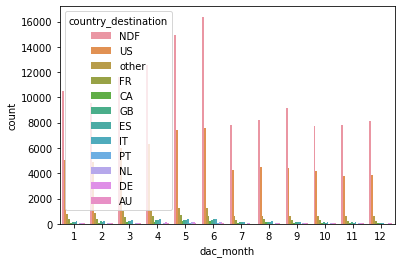

In [103]:
sns.countplot(x='dac_month',data=df_2,hue='country_destination')

In [104]:
#Analyzing first active
df_2['timestamp_first_active']=pd.to_datetime(df_2['timestamp_first_active'])

In [105]:
df_2['timestamp_first_active']

0       1970-01-01 05:34:50.319043255
1       1970-01-01 05:34:50.523174809
2       1970-01-01 05:34:50.609231247
3       1970-01-01 05:34:51.031060129
4       1970-01-01 05:34:51.208061105
5       1970-01-01 05:35:00.101215619
6       1970-01-01 05:35:00.102012558
7       1970-01-01 05:35:00.103191905
8       1970-01-01 05:35:00.104004211
9       1970-01-01 05:35:00.104023758
10      1970-01-01 05:35:00.104194251
11      1970-01-01 05:35:00.105051812
12      1970-01-01 05:35:00.105060859
13      1970-01-01 05:35:00.105083259
14      1970-01-01 05:35:00.107055820
15      1970-01-01 05:35:00.107204555
16      1970-01-01 05:35:00.107215125
17      1970-01-01 05:35:00.107224625
18      1970-01-01 05:35:00.108015641
19      1970-01-01 05:35:00.110010817
20      1970-01-01 05:35:00.110152120
21      1970-01-01 05:35:00.110220941
22      1970-01-01 05:35:00.111031438
23      1970-01-01 05:35:00.111224015
24      1970-01-01 05:35:00.111230808
25      1970-01-01 05:35:00.112131444
26      1970

In [106]:
## splitting the time first active column to 2 cloumns(date,time)
df_2['tfa_date']=df_2['timestamp_first_active'].dt.date
df_2['tfa_time']=df_2['timestamp_first_active'].dt.time

In [107]:
df_2.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,language,signup_app,signup_flow,signup_method,timestamp_first_active,dac_year,dac_month,dac_day,tfa_date,tfa_time
0,direct,direct,NaN,NDF,2010-06-28,NaN,untracked,Chrome,Mac Desktop,-unknown-,...,en,Web,0,facebook,1970-01-01 05:34:50.319043255,2010,6,28,1970-01-01,05:34:50.319043
1,seo,google,38.0,NDF,2011-05-25,NaN,untracked,Chrome,Mac Desktop,MALE,...,en,Web,0,facebook,1970-01-01 05:34:50.523174809,2011,5,25,1970-01-01,05:34:50.523174
2,direct,direct,56.0,US,2010-09-28,2010-08-02,untracked,IE,Windows Desktop,FEMALE,...,en,Web,3,basic,1970-01-01 05:34:50.609231247,2010,9,28,1970-01-01,05:34:50.609231
3,direct,direct,42.0,other,2011-12-05,2012-09-08,untracked,Firefox,Mac Desktop,FEMALE,...,en,Web,0,facebook,1970-01-01 05:34:51.031060129,2011,12,5,1970-01-01,05:34:51.031060
4,direct,direct,41.0,US,2010-09-14,2010-02-18,untracked,Chrome,Mac Desktop,-unknown-,...,en,Web,0,basic,1970-01-01 05:34:51.208061105,2010,9,14,1970-01-01,05:34:51.208061


In [108]:
df_2.shape

(275547, 21)

In [109]:
equal_dates2=df_2[df_2.date_account_created == df_2.tfa_date]
equal_dates2

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,...,language,signup_app,signup_flow,signup_method,timestamp_first_active,dac_year,dac_month,dac_day,tfa_date,tfa_time


#### No account created at the same time of the first activity

In [110]:
##some additional analysis

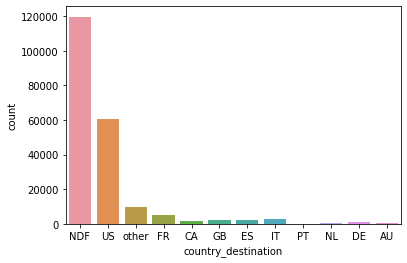

In [111]:
sns.countplot(x=df_2[df_2['language']=='en']['country_destination'])

In [112]:
df_2['language'].unique()

array(['en', 'fr', 'de', 'es', 'it', 'pt', 'zh', 'ko', 'ja', 'ru', 'pl',
       'el', 'sv', 'nl', 'hu', 'da', 'id', 'fi', 'no', 'tr', 'th', 'cs',
       'hr', 'ca', 'is', '-unknown-'], dtype=object)

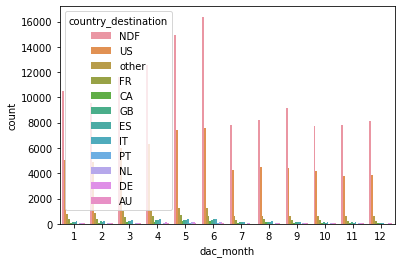

In [113]:
sns.countplot(x='dac_month',data=df_2,hue='country_destination')

#### most of the bookings took place in june

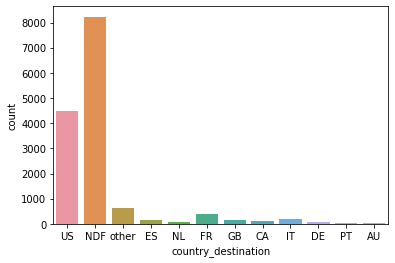

In [114]:
sns.countplot(x=df_2[df_2['dac_month']==8]['country_destination'])

### Missing Values

In [115]:
df_2.shape

(275547, 21)

In [116]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 21 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        158681 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null datetime64[ns]
date_first_booking         88908 non-null object
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null datetime64[ns]
dac_year                   275547 non-null int64
dac_month                 

#### Since the date of first booking has many missing values in the train set and is totally abscent in test set so i'll drop it

In [117]:
df_2.drop(['date_first_booking'],axis=1,inplace=True)

In [118]:
df_2.shape

(275547, 20)

In [119]:
##i'll fill the missing values of the age by the mean value

In [120]:
df_2.age.fillna(value=37,inplace=True)

In [121]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 20 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        275547 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null datetime64[ns]
first_affiliate_tracked    269462 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null datetime64[ns]
dac_year                   275547 non-null int64
dac_month                  275547 non-null int64
dac_day                   

In [122]:
df_2.first_affiliate_tracked.fillna(value='untracked',inplace=True)

In [123]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 20 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        275547 non-null float64
country_destination        213451 non-null object
date_account_created       275547 non-null datetime64[ns]
first_affiliate_tracked    275547 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
id                         275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
timestamp_first_active     275547 non-null datetime64[ns]
dac_year                   275547 non-null int64
dac_month                  275547 non-null int64
dac_day                   

In [124]:
df_2.head()

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,id,language,signup_app,signup_flow,signup_method,timestamp_first_active,dac_year,dac_month,dac_day,tfa_date,tfa_time
0,direct,direct,37.0,NDF,2010-06-28,untracked,Chrome,Mac Desktop,-unknown-,gxn3p5htnn,en,Web,0,facebook,1970-01-01 05:34:50.319043255,2010,6,28,1970-01-01,05:34:50.319043
1,seo,google,38.0,NDF,2011-05-25,untracked,Chrome,Mac Desktop,MALE,820tgsjxq7,en,Web,0,facebook,1970-01-01 05:34:50.523174809,2011,5,25,1970-01-01,05:34:50.523174
2,direct,direct,56.0,US,2010-09-28,untracked,IE,Windows Desktop,FEMALE,4ft3gnwmtx,en,Web,3,basic,1970-01-01 05:34:50.609231247,2010,9,28,1970-01-01,05:34:50.609231
3,direct,direct,42.0,other,2011-12-05,untracked,Firefox,Mac Desktop,FEMALE,bjjt8pjhuk,en,Web,0,facebook,1970-01-01 05:34:51.031060129,2011,12,5,1970-01-01,05:34:51.031060
4,direct,direct,41.0,US,2010-09-14,untracked,Chrome,Mac Desktop,-unknown-,87mebub9p4,en,Web,0,basic,1970-01-01 05:34:51.208061105,2010,9,14,1970-01-01,05:34:51.208061


#### Dropping unnecessary columns

In [125]:
df_2.drop(['timestamp_first_active','tfa_date','tfa_time','date_account_created','id'],axis=1,inplace=True)

In [126]:
df_2.shape

(275547, 15)

In [127]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 15 columns):
affiliate_channel          275547 non-null object
affiliate_provider         275547 non-null object
age                        275547 non-null float64
country_destination        213451 non-null object
first_affiliate_tracked    275547 non-null object
first_browser              275547 non-null object
first_device_type          275547 non-null object
gender                     275547 non-null object
language                   275547 non-null object
signup_app                 275547 non-null object
signup_flow                275547 non-null int64
signup_method              275547 non-null object
dac_year                   275547 non-null int64
dac_month                  275547 non-null int64
dac_day                    275547 non-null int64
dtypes: float64(1), int64(4), object(10)
memory usage: 43.6+ MB


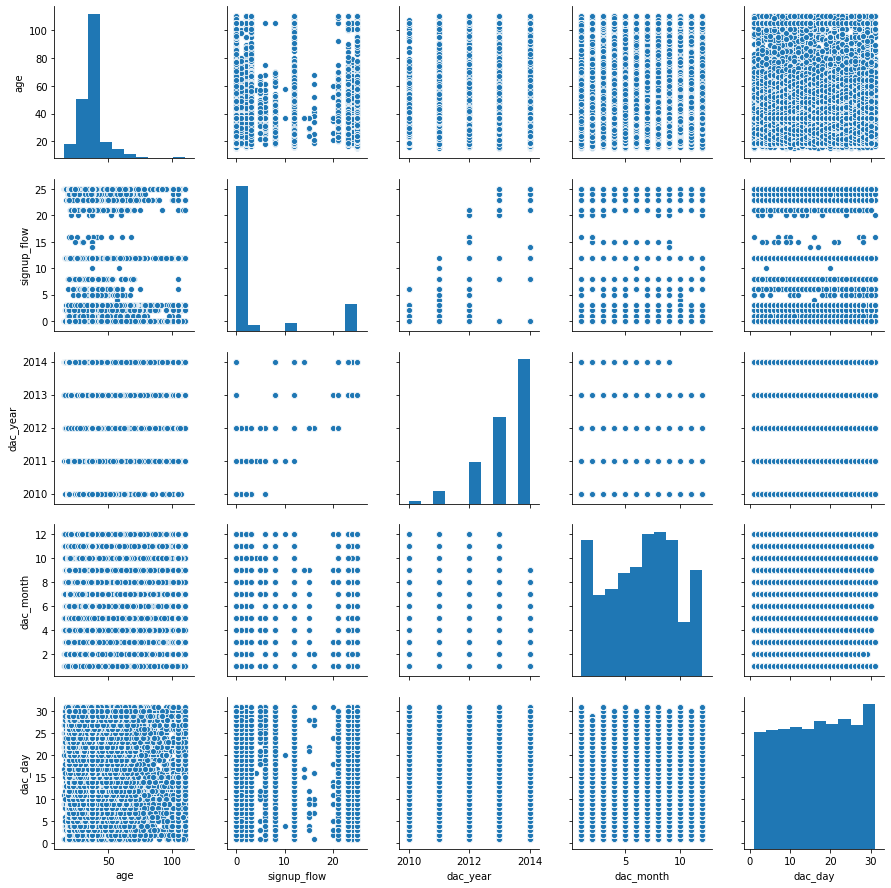

In [128]:
#Visualization after handling missing values
sns.pairplot(df_2,kind='scatter',palette='coolwarm')

#### Encoding categorical features

In [129]:
cat_features=['affiliate_channel','affiliate_provider','first_affiliate_tracked','first_browser','first_device_type','gender','language','signup_app','signup_method']

In [130]:
df_2.shape

(275547, 15)

In [131]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [132]:
encoded=df_2[cat_features].apply(encoder.fit_transform)

In [133]:
encoded.shape

(275547, 9)

In [134]:
encoded.head()

,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_method
0,2,4,6,8,3,0,6,2,1
1,7,8,6,8,3,2,6,2,1
2,2,4,6,22,6,1,6,2,0
3,2,4,6,17,3,1,6,2,1
4,2,4,6,8,3,0,6,2,0


In [135]:
df_3=df_2.drop(cat_features,axis=1)

In [136]:
df_3.shape

(275547, 6)

In [137]:
df_3.head()

,age,country_destination,signup_flow,dac_year,dac_month,dac_day
0,37.0,NDF,0,2010,6,28
1,38.0,NDF,0,2011,5,25
2,56.0,US,3,2010,9,28
3,42.0,other,0,2011,12,5
4,41.0,US,0,2010,9,14


In [138]:
df_final=pd.concat([df_3,encoded],axis=1)

In [139]:
df_final.shape

(275547, 15)

In [140]:
df_final.head()

,age,country_destination,signup_flow,dac_year,dac_month,dac_day,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_method
0,37.0,NDF,0,2010,6,28,2,4,6,8,3,0,6,2,1
1,38.0,NDF,0,2011,5,25,7,8,6,8,3,2,6,2,1
2,56.0,US,3,2010,9,28,2,4,6,22,6,1,6,2,0
3,42.0,other,0,2011,12,5,2,4,6,17,3,1,6,2,1
4,41.0,US,0,2010,9,14,2,4,6,8,3,0,6,2,0


In [141]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 275547 entries, 0 to 62095
Data columns (total 15 columns):
age                        275547 non-null float64
country_destination        213451 non-null object
signup_flow                275547 non-null int64
dac_year                   275547 non-null int64
dac_month                  275547 non-null int64
dac_day                    275547 non-null int64
affiliate_channel          275547 non-null int32
affiliate_provider         275547 non-null int32
first_affiliate_tracked    275547 non-null int32
first_browser              275547 non-null int32
first_device_type          275547 non-null int32
gender                     275547 non-null int32
language                   275547 non-null int32
signup_app                 275547 non-null int32
signup_method              275547 non-null int32
dtypes: float64(1), int32(9), int64(4), object(1)
memory usage: 34.2+ MB


#### Separating the train and test datasets

In [142]:
df_final_train=df_final[:213451]
df_final_test=df_final[213451:]

In [143]:
df_final_train.shape

(213451, 15)

In [144]:
df_final_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 213451 entries, 0 to 213450
Data columns (total 15 columns):
age                        213451 non-null float64
country_destination        213451 non-null object
signup_flow                213451 non-null int64
dac_year                   213451 non-null int64
dac_month                  213451 non-null int64
dac_day                    213451 non-null int64
affiliate_channel          213451 non-null int32
affiliate_provider         213451 non-null int32
first_affiliate_tracked    213451 non-null int32
first_browser              213451 non-null int32
first_device_type          213451 non-null int32
gender                     213451 non-null int32
language                   213451 non-null int32
signup_app                 213451 non-null int32
signup_method              213451 non-null int32
dtypes: float64(1), int32(9), int64(4), object(1)
memory usage: 18.7+ MB


In [145]:
df_final_test.shape

(62096, 15)

In [146]:
df_final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62096 entries, 0 to 62095
Data columns (total 15 columns):
age                        62096 non-null float64
country_destination        0 non-null object
signup_flow                62096 non-null int64
dac_year                   62096 non-null int64
dac_month                  62096 non-null int64
dac_day                    62096 non-null int64
affiliate_channel          62096 non-null int32
affiliate_provider         62096 non-null int32
first_affiliate_tracked    62096 non-null int32
first_browser              62096 non-null int32
first_device_type          62096 non-null int32
gender                     62096 non-null int32
language                   62096 non-null int32
signup_app                 62096 non-null int32
signup_method              62096 non-null int32
dtypes: float64(1), int32(9), int64(4), object(1)
memory usage: 5.4+ MB


#### Defining x,y

In [147]:
x=df_final_train.drop('country_destination',axis=1)

In [148]:
x.shape

(213451, 14)

In [149]:
x.head()

,age,signup_flow,dac_year,dac_month,dac_day,affiliate_channel,affiliate_provider,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_method
0,37.0,0,2010,6,28,2,4,6,8,3,0,6,2,1
1,38.0,0,2011,5,25,7,8,6,8,3,2,6,2,1
2,56.0,3,2010,9,28,2,4,6,22,6,1,6,2,0
3,42.0,0,2011,12,5,2,4,6,17,3,1,6,2,1
4,41.0,0,2010,9,14,2,4,6,8,3,0,6,2,0


In [150]:
y=df_final_train['country_destination']

In [151]:
y.shape

(213451,)

### Splitting the data to train and test data

In [152]:
from sklearn.model_selection import train_test_split

In [153]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

### Applying feature scaling(standardization and normalization) but i believe that it will not affect the output as i m going to use algorithms that don't depend on distance

In [154]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [155]:
sc=StandardScaler()

In [156]:
x_train_sc=sc.fit_transform(x_train)
x_test_sc=sc.transform(x_test)

In [157]:
norm=MinMaxScaler()

In [158]:
x_train_norm=norm.fit_transform(x_train)
x_test_norm=norm.transform(x_test)

### Importing classifiers

In [4]:
###inserting random forest
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

In [160]:
###importing decision tree
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

In [161]:
### importing KNN
from sklearn.neighbors import KNeighborsClassifier
knc=KNeighborsClassifier()

In [162]:
### importing xgboost
from xgboost import XGBClassifier
xgb=XGBClassifier()

#### Applying Forward feature selection

In [2]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [3]:
##Using random forest as our estimator
sfs=SFS(estimator=rfc,k_features=7,forward=True,floating=False,verbose=2,scoring=None)

In [377]:
sfs=sfs.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators wi

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:  1.1min finished

[2021-02-05 21:10:11] Features: 3/7 -- score: 0.6274137153242583[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:   58.4s finished

[2021-02-05 21:14:27] Features: 7/7 -- score: 0.6200583796705684

In [378]:
sfs.k_feature_names_

('age',
 'signup_flow',
 'dac_year',
 'gender',
 'language',
 'signup_app',
 'signup_method')

In [164]:
x_train_rfc=x_train[['age','signup_flow','dac_year','gender','language','signup_app','signup_method']]
x_test_rfc=x_test[['age','signup_flow','dac_year','gender','language','signup_app','signup_method']]

In [165]:
##Using xgboost as our  estimator
sfs_xgb=SFS(estimator=xgb,k_features=7,forward=True,floating=False,verbose=2,scoring=None)

In [382]:
sfs_xgb=sfs_xgb.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.5min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 36.2min finished

[2021-02-06 05:27:21] Features: 1/7 -- score: 0.5876719972043788[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  2.9min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 36.1min finished

[2021-02-06 06:03:29] Features: 2/7 -- score: 0.5921494412475587[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:  3.2min remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 38.0min finished

[2021-02-06 06:41:32] Features: 3/7 -- score: 0.62972266876209[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 ou

In [169]:
sfs_xgb.k_feature_names_

AttributeError: 'SequentialFeatureSelector' object has no attribute 'k_feature_names_'

In [166]:
x_train_xgb=x_train[['age','signup_flow','dac_year','first_browser','first_device_type','gender','signup_method']]
x_test_xgb=x_test[['age','signup_flow','dac_year','first_browser','first_device_type','gender','signup_method']]

In [167]:
##Using KNN as our  estimator
sfs_knc=SFS(estimator=knc,k_features=7,forward=True,floating=False,verbose=2,scoring=None)

In [384]:
sfs_knc=sfs_knc.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   58.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed: 25.1min finished

[2021-02-06 09:32:16] Features: 1/7 -- score: 0.5729092175959998[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   56.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed: 23.6min finished

[2021-02-06 09:55:50] Features: 2/7 -- score: 0.5660649241941769[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   41.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed: 14.6min finished

[2021-02-06 10:10:24] Features: 3/7 -- score: 0.5703162422609462[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [386]:
sfs_knc.k_feature_names_

('age',
 'dac_year',
 'affiliate_channel',
 'affiliate_provider',
 'gender',
 'signup_app',
 'signup_method')

In [168]:
x_train_knc=x_train[['age','dac_year','affiliate_channel','affiliate_provider','gender','signup_app','signup_method']]
x_test_knc=x_test[['age','dac_year','affiliate_channel','affiliate_provider','gender','signup_app','signup_method']]

### Applying dimensionality reduction(PCA)

In [169]:
from sklearn.decomposition import PCA

In [170]:
pca=PCA(n_components=2)

In [171]:
x_train_pca=pca.fit_transform(x_train)
x_test_pca=pca.transform(x_test)

## Applying Algorithms

In [172]:
##Applying Random Forest
rfc.fit(x_train_rfc,y_train)

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [173]:
pred_rfc=rfc.predict(x_test_rfc)

In [174]:
##Applying xgboost
xgb.fit(x_train_xgb,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [175]:
pred_xgb=xgb.predict(x_test_xgb)

In [176]:
##Applying KNN

In [177]:
knc.fit(x_train_knc,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [178]:
pred_knc=knc.predict(x_test_knc)

## Evaluating the models

In [179]:
from sklearn.metrics import classification_report,confusion_matrix

In [180]:
print(classification_report(y_test,pred_rfc))

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       171
          CA       0.00      0.00      0.00       420
          DE       0.00      0.00      0.00       334
          ES       0.03      0.00      0.00       686
          FR       0.02      0.00      0.00      1505
          GB       0.05      0.00      0.01       748
          IT       0.00      0.00      0.00       866
         NDF       0.68      0.85      0.75     37206
          NL       0.00      0.00      0.00       225
          PT       0.00      0.00      0.00        77
          US       0.49      0.44      0.46     18785
       other       0.07      0.01      0.01      3013

    accuracy                           0.62     64036
   macro avg       0.11      0.11      0.10     64036
weighted avg       0.54      0.62      0.57     64036



In [181]:
print(classification_report(y_test,pred_xgb))

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       171
          CA       0.00      0.00      0.00       420
          DE       0.00      0.00      0.00       334
          ES       0.00      0.00      0.00       686
          FR       0.00      0.00      0.00      1505
          GB       0.00      0.00      0.00       748
          IT       0.00      0.00      0.00       866
         NDF       0.69      0.86      0.76     37206
          NL       0.00      0.00      0.00       225
          PT       0.00      0.00      0.00        77
          US       0.49      0.46      0.48     18785
       other       0.00      0.00      0.00      3013

    accuracy                           0.63     64036
   macro avg       0.10      0.11      0.10     64036
weighted avg       0.54      0.63      0.58     64036



In [182]:
print(classification_report(y_test,pred_knc))

              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       171
          CA       0.02      0.00      0.00       420
          DE       0.02      0.01      0.01       334
          ES       0.02      0.00      0.01       686
          FR       0.04      0.01      0.02      1505
          GB       0.05      0.01      0.01       748
          IT       0.02      0.01      0.01       866
         NDF       0.65      0.84      0.73     37206
          NL       0.00      0.00      0.00       225
          PT       0.00      0.00      0.00        77
          US       0.44      0.33      0.38     18785
       other       0.09      0.02      0.03      3013

    accuracy                           0.59     64036
   macro avg       0.11      0.10      0.10     64036
weighted avg       0.51      0.59      0.54     64036



#### xgboost has the highest accuracy

## Hyperparameter tuning

In [183]:
from sklearn.model_selection import GridSearchCV

In [184]:
param_grid={'n_estimators':[10,100,1000]}

In [185]:
grid=GridSearchCV(xgb,param_grid,verbose=2,cv=10)

In [186]:
grid.fit(x_train_xgb,y_train)

Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   5.7s
[CV] n_estimators=10 .................................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.6s remaining:    0.0s


[CV] .................................. n_estimators=10, total=   5.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   5.3s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   5.4s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   5.7s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   6.8s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   5.2s
[CV] n_estimators=10 .................................................
[CV] .................................. n_estimators=10, total=   5.2s
[CV] n_estimators=10 .................................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 92.7min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='multi:softprob',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={'n_estimators': [10, 100, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbo

In [187]:
grid.best_score_

0.6330622762105544

In [188]:
grid.best_params_

{'n_estimators': 1000}

In [190]:
grid_pred=grid.predict(x_test_xgb)

In [191]:
print(classification_report(y_test,grid_pred))

C:\Users\mshiha\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


              precision    recall  f1-score   support

          AU       0.00      0.00      0.00       171
          CA       0.00      0.00      0.00       420
          DE       0.00      0.00      0.00       334
          ES       0.00      0.00      0.00       686
          FR       0.00      0.00      0.00      1505
          GB       0.00      0.00      0.00       748
          IT       0.00      0.00      0.00       866
         NDF       0.69      0.86      0.76     37206
          NL       0.00      0.00      0.00       225
          PT       0.00      0.00      0.00        77
          US       0.49      0.46      0.48     18785
       other       0.00      0.00      0.00      3013

    accuracy                           0.63     64036
   macro avg       0.10      0.11      0.10     64036
weighted avg       0.54      0.63      0.58     64036



#### number of estimators =1000 give the best accuracy

In [104]:
##Testing git